In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()     # Apply seaborn's default aesthetic
sns.set_palette("Blues")   # simple color palette

In [ ]:
from google.colab import files
upload = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1") #Dataset loaded


In [ ]:
df.shape #Shape


(9994, 21)

In [ ]:
df.isnull().sum() #Missing Values


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.drop_duplicates(inplace=True) #Remove duplicates if have


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #converted date columns to date format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [ ]:
df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days #Create shipping time


In [ ]:
df.columns = df.columns.str.strip() #Strip spaces from column names


In [ ]:
df['Year'] = df['Order Date'].dt.year #Created year and month for time siries
df['Month'] = df['Order Date'].dt.month_name()


In [ ]:
df.describe() #Basic Stats


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Ship_Days,Year
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,2015.722233
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2014.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,2015.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,2016.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,2017.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,2017.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,1.123555


In [ ]:
df.head() #First few rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship_Days,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2016,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,October


In [ ]:
df.nunique() #check unique value


,0
Row ID,9994
Order ID,5009
Order Date,1237
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531


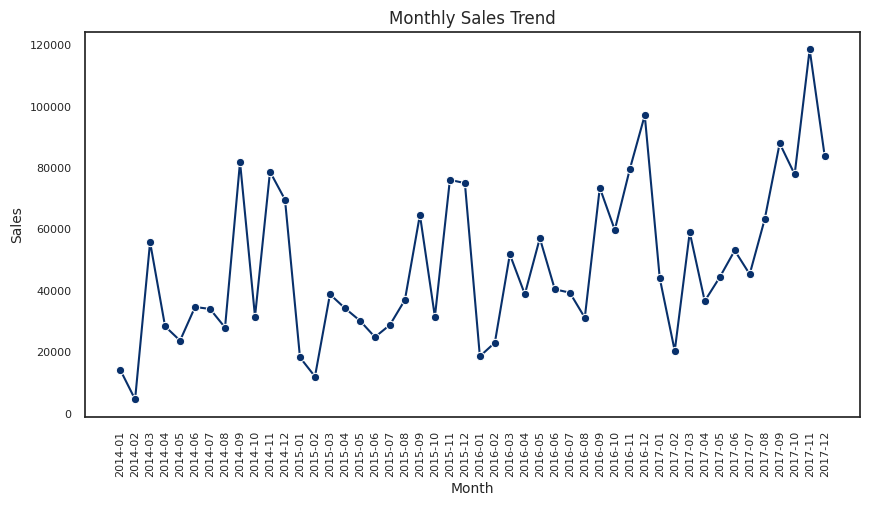

In [ ]:
# 1. Monthly Sales Trend
# Create Year-Month column
df['Year_Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Month
monthly_sales = df.groupby('Year_Month')['Sales'].sum().reset_index()

# Plot
sns.set_style('white') # Set style to white to remove gray background
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Year_Month', y='Sales', marker='o', color='#08306B')
plt.title("Monthly Sales Trend", fontsize=12)
plt.xlabel("Month", fontsize= 10)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Sales",fontsize = 10)
plt.yticks(fontsize=8)
plt.gca().grid(False)
plt.show()

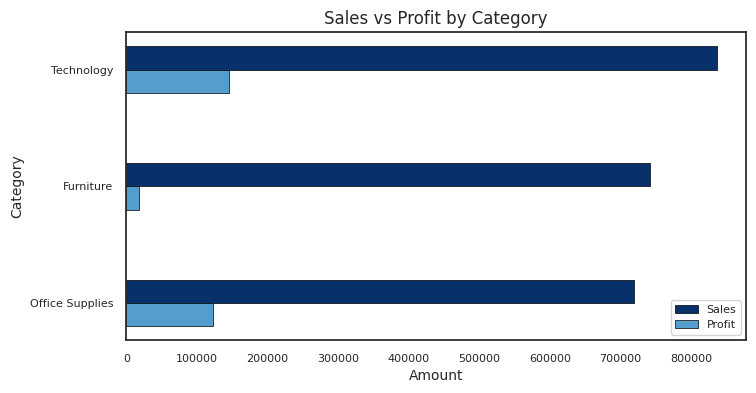

In [ ]:
# 2. Sales vs Profit by Category
# Group data
cat_data = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Sort by Sales in asc order
cat_data = cat_data.sort_values(by='Sales', ascending=True)

# Plot
plt.figure(figsize=(8,4)) # Adjust figure size for better readability of horizontal bars
y = np.arange(len(cat_data['Category']))   # y positions
height = 0.20                               # bar height

plt.barh(y + height/2, cat_data['Sales'], height, label='Sales', color='#08306B',edgecolor='black', linewidth=0.5)
plt.barh(y - height/2, cat_data['Profit'], height, label='Profit', color='#539ECD',edgecolor='black', linewidth=0.5)
plt.title("Sales vs Profit by Category", fontsize = 12)
plt.xlabel("Amount",fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel("Category", fontsize = 10)
plt.yticks(y, cat_data['Category'], fontsize = 8)
legend_plt_1 = plt.legend(fontsize=8)
plt.show()

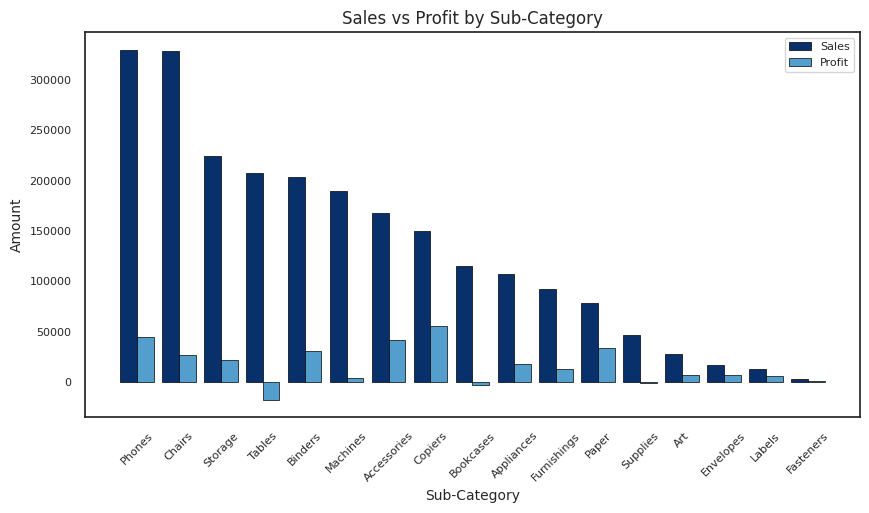

In [ ]:
# 3. Sales vs Profit by Sub Category
# Group data
sub_data = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

# Sort by Sales (looks cleaner)
sub_data = sub_data.sort_values('Sales', ascending=False)

# Positions
x = np.arange(len(sub_data['Sub-Category']))
width = 0.4  # width of bars

# Plot
plt.figure(figsize=(10,5))
plt.bar(x - width/2, sub_data['Sales'], width, label='Sales', color='#08306B',edgecolor='black', linewidth=0.5)
plt.bar(x + width/2, sub_data['Profit'], width, label='Profit', color='#539ECD',edgecolor='black', linewidth=0.5)
plt.title("Sales vs Profit by Sub-Category",fontsize = 12)
plt.xlabel("Sub-Category",fontsize = 10)
plt.xticks(x, sub_data['Sub-Category'], rotation=45,fontsize = 8)
plt.ylabel("Amount",fontsize = 10)
plt.yticks(fontsize = 8)
legend_plt_1 = plt.legend(fontsize=8)
plt.show()

In [ ]:
# 4. Top 10 Most profitable products and least products making loss
# Group by Product Name and sum Profit
product_profit = df.groupby('Product Name')['Profit'].sum().reset_index()

# Sort for most profitable products (top 10)
most_profitable_products = product_profit.sort_values(by='Profit', ascending=False).head(10)

# Sort for least products loss Making (top 10)
least_profitable_products = product_profit.sort_values(by='Profit', ascending=True).head(10)

# Plotting Most Profitable Products
plt.figure(figsize=(6, 3))
sns.barplot(x='Profit', y='Product Name', data=most_profitable_products, hue='Product Name', palette='Blues_r',
            legend=False,edgecolor='black', linewidth=1.0)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Product Name', fontsize = 10)
plt.yticks(fontsize = 6)
plt.show()

# 5. Plotting Least Profitable Products
plt.figure(figsize=(6, 3))
sns.barplot(x='Profit', y='Product Name', data=least_profitable_products, hue='Product Name', palette='Blues',
            legend=False,edgecolor='black', linewidth=1.0)
plt.title('Top 10 Least Products (Loss-Making)', fontsize = 12)
plt.xlabel('Total Profit', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Product Name', fontsize = 10)
plt.yticks(fontsize = 6)
plt.show()

NameError: name 'df' is not defined

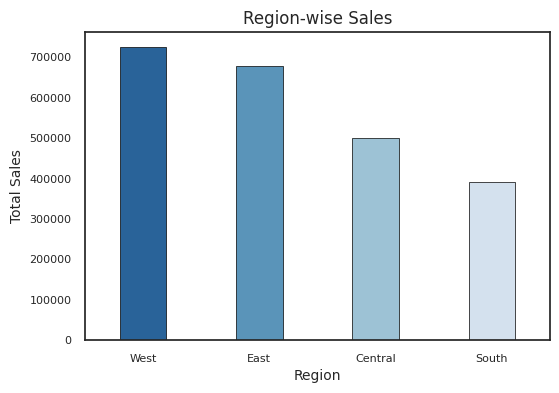

In [ ]:
# 6. Sales by Region

# Group by Region and sum Sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Sort for better visualization (optional, but cleaner)
region_sales = region_sales.sort_values('Sales', ascending=False)

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Region', y='Sales', data=region_sales, hue='Region', palette='Blues_r',
            legend=False,edgecolor='black',linewidth=0.5, width=0.4)
plt.title('Region-wise Sales', fontsize = 12)
plt.xlabel('Region',fontsize = 10)
plt.xticks(fontsize= 8)
plt.ylabel('Total Sales',fontsize = 10)
plt.yticks(fontsize= 8)
plt.show()

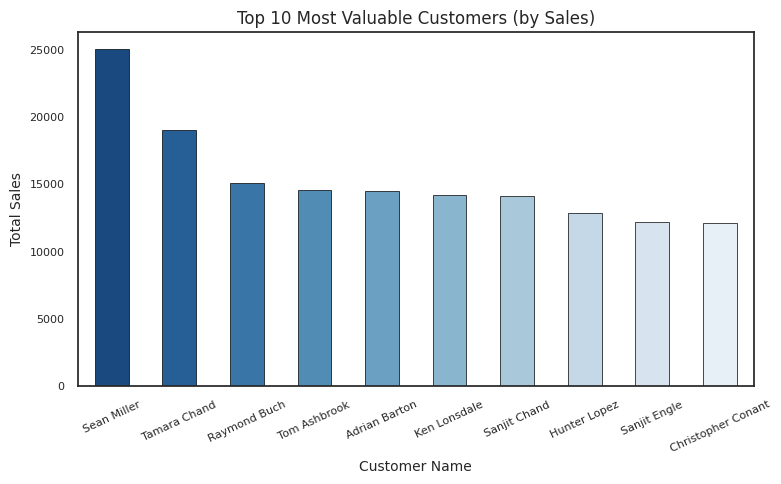

In [ ]:
# 7. Most Valuable Customer by Sales
# Group by Customer and sort
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(y=top_customers.values, x=top_customers.index, hue=top_customers.index,
            palette ="Blues_r",edgecolor='black', linewidth=0.5, width=0.5)
plt.title("Top 10 Most Valuable Customers (by Sales)", fontsize= 12)
plt.xlabel("Customer Name", fontsize = 10)
plt.xticks(rotation=25, fontsize = 8)
plt.ylabel("Total Sales", fontsize = 10)
plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

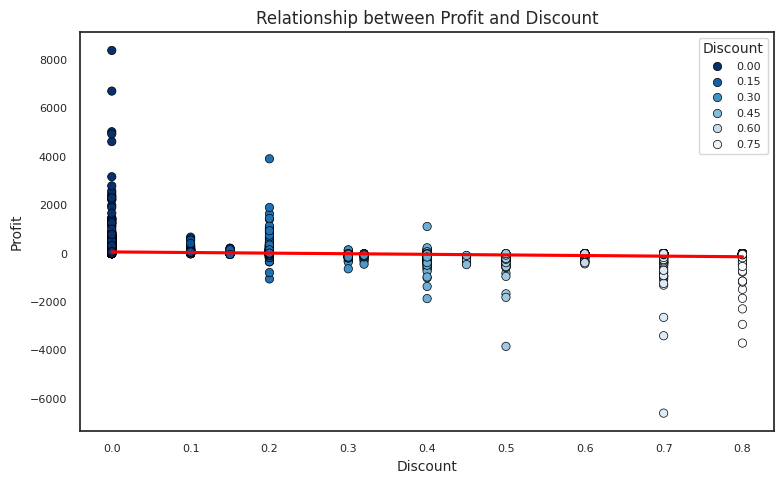

In [ ]:
# 8. Relationship between Profit and Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Discount', palette ='Blues_r',edgecolor='black', linewidth=0.5)
sns.regplot(x=df['Discount'], y=df['Profit'], scatter=False, color = 'red')
plt.title("Relationship between Profit and Discount", fontsize = 12)
plt.xlabel('Discount', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Profit', fontsize = 10)
plt.yticks(fontsize = 8)
legend_plt_1 = plt.legend(fontsize=8)
legend_plt_1.set_title('Discount', prop={'size': 10})
plt.tight_layout()
plt.show()

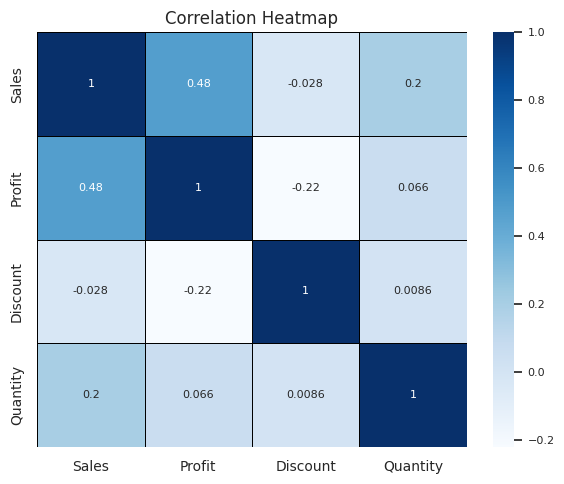

In [ ]:
# 10. Correlation Heatmap
corr = df[['Sales','Profit','Discount','Quantity']].corr()

plt.figure(figsize=(6,5))
heatmap_plot = sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5,linecolor='black', annot_kws={"size": 8})
plt.title("Correlation Heatmap",fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Get the colorbar object and set its tick label font size
cbar = heatmap_plot.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()